## 5. CART(Classification and Regression Tree)

의사결정나무(Decision Tree) 알고리즘은 의사결정규칙(decision rule)을 도표화하여 관심 대상이 되는 집단을 몇 개의 소집단으로 분류(classification)하거나 예측(prediction)을 수행하는 분석 방법이다. 데이터 마이닝 기법 중의 하나인 의사결정나무는 각 자료 내에 존재하는 관계와 규칙을 탐색하고 찾아내어 모형화한다. DT는 반복적으로 분류 규칙을 생성하여 가장 효과적인 분류 규칙 조합을 완성해가며, 의사 결정 규칙을 나무 구조(Tree Structure)로 나타내어 전체 자료를 몇 개의 소집단으로 분류하거나 예측을 수행한다.

CART : Recursive binary splits that minimize the impurity of child nodes

CART(Classification and Regression Tree)는 불순도(impurity)를 이용하여 binary split을 수행하는 알고리즘이다. 트리 모델은 쉽게 말해 if-then-else 규칙의 집합이라고 할 수 있다. 또한, CART는 재귀 분할 알고리즘을 사용하는데, 이는 예측변수 값을 기준으로 데이터를 반복적으로 분할해나가는 알고리즘이다. 그러나, 일반적인 DT와 달리 CART는 하나의 규칙으로 2개의 하위 노드만을 반복적으로 만든다.
* Recursive partitioning(재귀 분할) : 마지막 분할 영역에 해당하는 출력이 최대한 비슷한 결과를 보이도록 데이터를 반복적으로 분할하는 것
* split value(분할값) : 분할값을 기준으로 예측변수를 그 값보다 작은 영역과 큰 영역으로 분할
* node(마디, 노드) : DT와 같은 가지치기 형태로 구성된 규칙들의 집합에서, 분할 규칙의 시각적 표시
* leaf(잎) : if-then 규칙의 가장 마지막 부분, tree의 마지막 branch이자 최종적인 분류 규칙
* impurity(불순도) : 데이터를 분할한 집합에서 서로 다른 클래스의 데이터가 얼마나 섞여있는지를 나타내는 척도
* pruning(가지치기) : 학습이 끝난 트리 모델에서 오버피팅을 줄이기 위해 가지들을 하나씩 잘라내는 과정
* split variable : 분할되는 설명변수(feature)

### 1) regression tree

regression tree는 RSS(residual sum of square)를 더 작게 만드는 변수를 기준으로 split을 선택하며 tree를 만들어간다. 예를 들어, $X_1, X_2, X_3$ 3개의 변수가 있다고 가정하자.

먼저, 데이터를 데이터 프레임 형식으로 만든다.

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd

# Data
Y=[1, 5, 3, 10]
X1=[4, 8, 7, 3]

# Data to DataFrame
df=pd.DataFrame((zip(Y, X1)), columns=['Y', 'X1']) ## zip : 열로 묶어줌.
df

,Y,X1
0,1,4
1,5,8
2,3,7
3,10,3


$X_1$에 대하여 split을 만들 수 있는 방법은 4가지가 있다. (직접 그려보기)

다음으로 두 개의 case에 대한 child node의 RSS를 계산한다. case별 RSS를 구하는 방법은 다음과 같다.

In [2]:
n, p=df.shape
print(n)
print(p)

4
2


In [3]:
df

,Y,X1
0,1,4
1,5,8
2,3,7
3,10,3


In [4]:
data_copy=df.sort_values(by=df.columns[1], axis=0)
data_copy

,Y,X1
3,10,3
0,1,4
2,3,7
1,5,8


In [5]:
def find_split_node(matrix):
    import numpy as np
    import pandas as pd

    # n : row 개수, p : column 개수
    n, p=matrix.shape ## 튜플 값 나누기

    # initialize dictionary -> key : node, value : RSS인 dictionary res
    res={}
    for i in range(p-1):
        data=matrix.iloc[:, [0, i+1]] ## Y열(0열)과 1열, Y열(0열)과 2열, ...
        data_copy=data.sort_values(by=matrix.columns[i+1], axis=0) ## 선택한 열의 순서로 정렬
        col_name=matrix.columns[i+1]
        print('\n')
        print(f'{matrix.columns[i+1]}에서 node 찾기')
        
        # initialize dictionary
        res1={}
        
        for j in range(n):
            node=data_copy.iloc[j, 1]
            print(f'node={node}')

            # set list : 기준 노드를 기준으로 좌, 우로 분할
            left_list=[]
            right_list=[]

            # find split node(기준 노드 찾기)
            for k in range(n): ## 전체 행에 대해
                if data_copy.iloc[k, 1]<node: ## node가 선택한 열의 값보다 크면 left_list
                    left_list.append(data_copy.iloc[k, 0]) ## Y열의 해당 행의 값을 left.list(좌측)에 추가
                else: ## node가 선택한 열의 값보다 작거나 같으면 right_list
                    right_list.append(data_copy.iloc[k, 0])
            print(left_list, right_list)

            # calculate RSS
            left_list=left_list-np.mean(left_list) ## 편차
            left_list=sum(left_list**2) ## 편차 제곱의 합
            right_list=right_list-np.mean(right_list)
            right_list=sum(right_list**2)
            
            rss=round(left_list+right_list, 4) ## list를 이어 줌?

            # key : node, value : RSS
            res1[node]=rss
            
        print(res1)

        # X1, X2, X3에서 RSS를 최소화하는 node와 RSS를 저장
        res[col_name]={min(res1, key=res1.get):round(min(res1.values()), 4)} ## nested dictionary(중첩 dictionary) : value 값 안에도 dictionary
    print('\n')
    print(res)

In [6]:
## 적어보기
find_split_node(df)



X1에서 node 찾기
node=3
[] [10, 1, 3, 5]
node=4
[10] [1, 3, 5]
node=7
[10, 1] [3, 5]
node=8
[10, 1, 3] [5]
{3: 44.75, 4: 8.0, 7: 42.5, 8: 44.6667}


{'X1': {4: 8.0}}


$X_1$에 대하여 RSS를 최소로 만드는 split은 $X_1=4$이므로 이를 저장한 후, $X_2, X_3$에 대해서도 반복적인(recursive) 계산을 수행한다.

따라서, first split을 선택하기 위한 선택지가 총 3개($X_1, X_2, X_3$)로 발생하며, 이중 RSS가 가장 최소인 것을 first split으로 선택한다.

다음 split을 결정하기 위해 first split node를 기준으로 데이터를 분류한다. 다음으로, 각각의 분류된 데이터 안에서 다시 동일한 과정을 반복하며, second split node를 구한다.

완성된 regression tree의 마지막 child node(leaf, 잎)에서 예측값들은 그 node에 속한 Y들의 평균이다.

다음으로 전체 데이터에서 regression tree를 이용하여 split node를 찾아보도록 한다. 우선 data를 matrix 형태로 만든다.

In [7]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd

Y=[2, 8, 9, 4, 4, 5, 5]
X1=[1, 5, 3, 10, 6, 2, 5]
X2=[1, 1, 8, 6, 7, 8, 5]
X3=[7, 9, 4, 3, 2, 3, 5]

df=pd.DataFrame((zip(Y, X1, X2, X3)), columns=['Y', 'X1', 'X2', 'X3'])
df

,Y,X1,X2,X3
0,2,1,1,7
1,8,5,1,9
2,9,3,8,4
3,4,10,6,3
4,4,6,7,2
5,5,2,8,3
6,5,5,5,5


In [8]:
find_split_node(df)



X1에서 node 찾기
node=1
[] [2, 5, 9, 8, 5, 4, 4]
node=2
[2] [5, 9, 8, 5, 4, 4]
node=3
[2, 5] [9, 8, 5, 4, 4]
node=5
[2, 5, 9] [8, 5, 4, 4]
node=5
[2, 5, 9] [8, 5, 4, 4]
node=6
[2, 5, 9, 8, 5] [4, 4]
node=10
[2, 5, 9, 8, 5, 4] [4]
{1: 35.4286, 2: 22.8333, 3: 26.5, 5: 35.4167, 6: 30.8, 10: 33.5}


X2에서 node 찾기
node=1
[] [2, 8, 5, 4, 4, 9, 5]
node=1
[] [2, 8, 5, 4, 4, 9, 5]
node=5
[2, 8] [5, 4, 4, 9, 5]
node=6
[2, 8, 5] [4, 4, 9, 5]
node=7
[2, 8, 5, 4] [4, 9, 5]
node=8
[2, 8, 5, 4, 4] [9, 5]
node=8
[2, 8, 5, 4, 4] [9, 5]
{1: 35.4286, 5: 35.2, 6: 35.0, 7: 32.75, 8: 27.2}


X3에서 node 찾기
node=2
[] [4, 4, 5, 9, 5, 2, 8]
node=3
[4] [4, 5, 9, 5, 2, 8]
node=3
[4] [4, 5, 9, 5, 2, 8]
node=4
[4, 4, 5] [9, 5, 2, 8]
node=5
[4, 4, 5, 9] [5, 2, 8]
node=7
[4, 4, 5, 9, 5] [2, 8]
node=9
[4, 4, 5, 9, 5, 2] [8]
{2: 35.4286, 3: 33.5, 4: 30.6667, 5: 35.0, 7: 35.2, 9: 26.8333}


{'X1': {2: 22.8333}, 'X2': {8: 27.2}, 'X3': {9: 26.8333}}


최소 RSS는 22.8333이며 first node는 $X_1$의 2이다. 다음 second node를 찾기 위해선 first node를 기준으로 데이터를 분류한 후 위의 과정을 반복한다.

In [9]:
df_copy=df.sort_values(by='X1', axis=0)
df_left=df_copy.loc[df['X1']<2]
df_right=df_copy.loc[df['X1']>=2]

In [10]:
df_left

,Y,X1,X2,X3
0,2,1,1,7


In [11]:
df_right

,Y,X1,X2,X3
5,5,2,8,3
2,9,3,8,4
1,8,5,1,9
6,5,5,5,5
4,4,6,7,2
3,4,10,6,3


first node를 기준으로 데이터를 df_left와 df_right로 나누었다. 다음으로 각 데이터의 second node를 구한다. 이때, df_left의 경우 데이터의 개수가 1개이므로 node를 구할 수 없다.

first node를 기준으로 나눈 데이터의 leaf node는 값이 하나이므로 평균을 구할 필요 없이, 2이다.

In [12]:
find_split_node(df_right)



X1에서 node 찾기
node=2
[] [5, 9, 8, 5, 4, 4]
node=3
[5] [9, 8, 5, 4, 4]
node=5
[5, 9] [8, 5, 4, 4]
node=5
[5, 9] [8, 5, 4, 4]
node=6
[5, 9, 8, 5] [4, 4]
node=10
[5, 9, 8, 5, 4] [4]
{2: 22.8333, 3: 22.0, 5: 18.75, 6: 12.75, 10: 18.8}


X2에서 node 찾기
node=1
[] [8, 5, 4, 4, 5, 9]
node=5
[8] [5, 4, 4, 5, 9]
node=6
[8, 5] [4, 4, 5, 9]
node=7
[8, 5, 4] [4, 5, 9]
node=8
[8, 5, 4, 4] [5, 9]
node=8
[8, 5, 4, 4] [5, 9]
{1: 22.8333, 5: 17.2, 6: 21.5, 7: 22.6667, 8: 18.75}


X3에서 node 찾기
node=2
[] [4, 5, 4, 9, 5, 8]
node=3
[4] [5, 4, 9, 5, 8]
node=3
[4] [5, 4, 9, 5, 8]
node=4
[4, 5, 4] [9, 5, 8]
node=5
[4, 5, 4, 9] [5, 8]
node=9
[4, 5, 4, 9, 5] [8]
{2: 22.8333, 3: 18.8, 4: 9.3333, 5: 21.5, 9: 17.2}


{'X1': {6: 12.75}, 'X2': {5: 17.2}, 'X3': {4: 9.3333}}


최소의 RSS는 9.3333이며 second node는 $X_3$의 4이다.

In [13]:
df_copy=df_right.sort_values(by='X3', axis=0)
df_left=df_copy.loc[df['X3']<4]
df_right=df_copy.loc[df['X3']>=4]

In [14]:
df_left

,Y,X1,X2,X3
4,4,6,7,2
5,5,2,8,3
3,4,10,6,3


In [15]:
df_right

,Y,X1,X2,X3
2,9,3,8,4
6,5,5,5,5
1,8,5,1,9


In [16]:
print(round(np.mean(df_left.Y), 2))

4.33


In [17]:
print(round(np.mean(df_right.Y), 2))

7.33


tree 그림 그려보기

sklearn의 내장 데이터인 load_diabetes()를 이용하여 regression tree를 만들어보도록 한다.

#### a) import dataset

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

mydata=datasets.load_diabetes()
mydata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

#### b) data preprocessing

In [19]:
# feature columns
df=pd.DataFrame(mydata['data'], columns=mydata['feature_names'])

# target column 추가
df['diabetes_score']=mydata['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [20]:
# X, Y split
X=df.iloc[:, :-1].values
Y=df.iloc[:, -1].values

#### c) model fitting

In [21]:
from sklearn.tree import DecisionTreeRegressor

cart_reg=DecisionTreeRegressor(max_depth=3)
cart_reg.fit(X, Y)

DecisionTreeRegressor(max_depth=3)

#### d) Test model

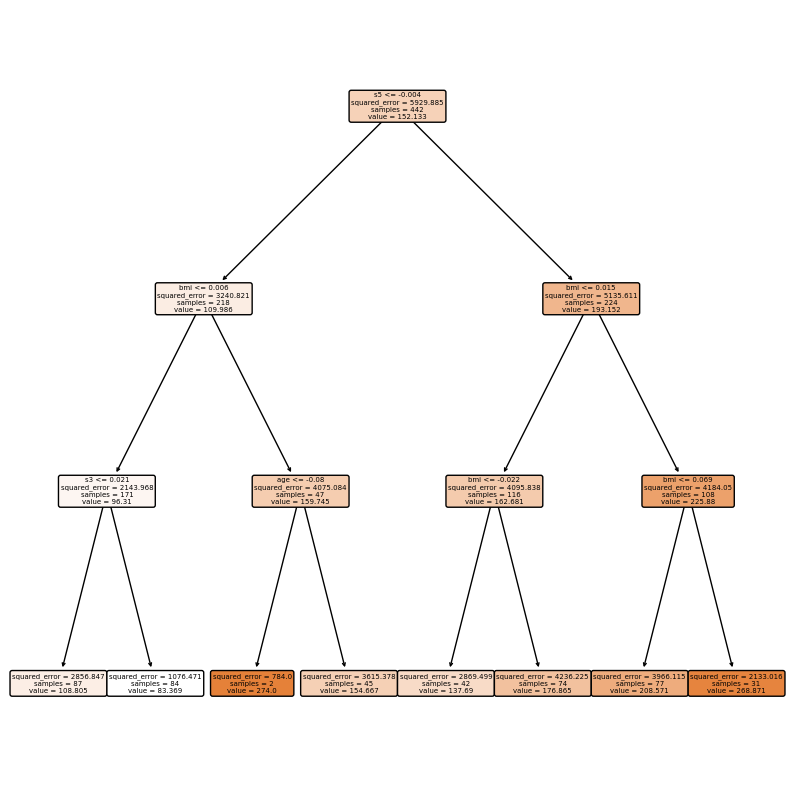

In [22]:
from sklearn import tree

fig=plt.figure(figsize=(10, 10))
_=tree.plot_tree(cart_reg, ## 그래프의 변수명을 _로 부여했을 때 부가 설명이 길게 뜨지 않고, 그래프만 출력됨
                 feature_names=df.columns[0:10],
                 impurity=True,
                 rounded=True,
                 filled=True
                )

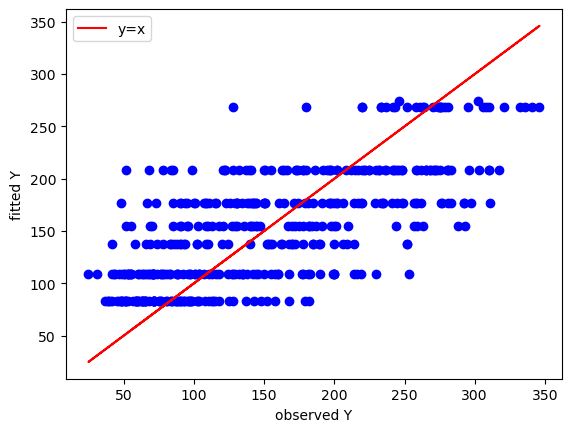

In [23]:
import matplotlib.pyplot as plt

# sns.set_theme(color_codes=True)

plt.scatter(Y, cart_reg.predict(X), color='b') ## observed Y와 fitted Y 산점도
plt.plot(Y, Y, color='r', label='y=x')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import r2_score

print(round(r2_score(Y, cart_reg.predict(X)), 3)) ## R squared

0.501


### 2) classification tree

classification tree는 regression tree와 마찬가지로 각 분할 영역에 대한 불순도를 측정해가며 모델링을 한다. 불순도(impurity)를 측정하는 대표적인 지표는 엔트로피(entropy), 지니계수(Gini index)이다. CART의 경우 하나의 상위 노드 당 두 개의 하위 노드가 발생하므로 이진 분류 문제로 간주하여 불순도는 다음과 같이 계산할 수 있다. A는 분할 영역이며, p는 해당 파티션 내에서 오분류된 데이터의 비율이다.

완성된 tree에서 마지막 child node(leaf, 잎)의 예측값은 Y의 majority class를 선택한다. 즉, voting 방식을 이용하는 것이다.

날씨 데이터를 CART 알고리즘에 적용시켜 그 날 야외활동을 할 수 있는지 아닌지 판단해보자.

#### a) import dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [26]:
mydata=pd.read_csv('https://raw.githubusercontent.com/yohanesgultom/machine-learning-assignment/master/playtennis.data')
mydata.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#### b) data preprocessing

In [27]:
for i, name in enumerate(mydata.columns):
    print(f'{i+1}번째 변수 : {name}')
    print(mydata[name].value_counts())
    print('\n')

1번째 변수 : Outlook
Outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64


2번째 변수 : Temperature
Temperature
Mild    6
Hot     4
Cool    4
Name: count, dtype: int64


3번째 변수 : Humidity
Humidity
High      7
Normal    7
Name: count, dtype: int64


4번째 변수 : Wind
Wind
Weak      8
Strong    6
Name: count, dtype: int64


5번째 변수 : PlayTennis
PlayTennis
Yes    9
No     5
Name: count, dtype: int64




모든 변수가 범주형 변수이다. 따라서 데이터 프레임으로 데이터를 변환 후 라벨 인코딩과 원-핫 인코딩을 한다.

In [28]:
mydf=pd.DataFrame(data=mydata.values, columns=mydata.columns)

mydf=pd.get_dummies(data=mydf, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'],
                    prefix=['Outlook', 'Temperature', 'Humidity', 'Wind'], dtype=int)

encoder=LabelEncoder()
mydf['PlayTennis']=encoder.fit_transform(mydf['PlayTennis'])

mydf.head(3)

,PlayTennis,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,0,1,0,1,0,1,0,0,1
1,0,0,0,1,0,1,0,1,0,1,0
2,1,1,0,0,0,1,0,1,0,0,1


In [29]:
X=mydf.iloc[:, 1:].values
y=mydf.iloc[:, 0].values

#### c) model fitting

In [30]:
cart=DecisionTreeClassifier(criterion='gini', random_state=0)
cart.fit(X, y)

DecisionTreeClassifier(random_state=0)

#### d) Test model

학습된 모델을 이용하여 트리를 plot으로 그려본다.

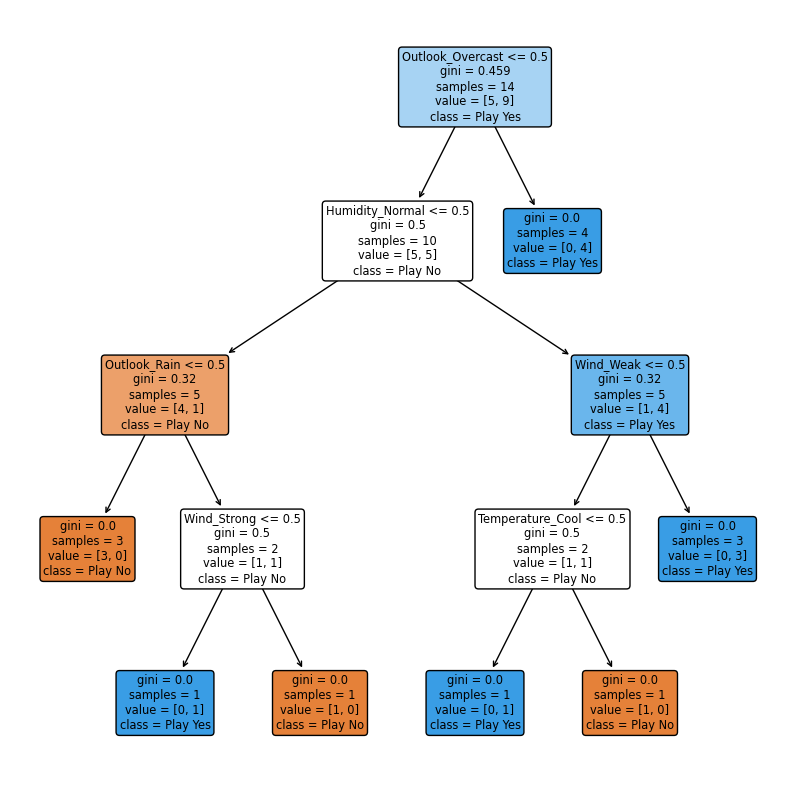

In [31]:
fig=plt.figure(figsize=(10, 10))
_=tree.plot_tree(cart,
                 feature_names=mydf.columns[1:],
                 class_names=np.array(['Play No', 'Play Yes']),
                 impurity=True,
                 rounded=True,
                 filled=True
                )

알고리즘의 성능을 판단하기 위해 confusion matrix와 오분류를 계산한다.

In [32]:
from sklearn.metrics import confusion_matrix
mtx=confusion_matrix(y, cart.predict(X))

label=['Play No', 'Play Yes']
table=pd.DataFrame(mtx, columns=label, index=label)
table

,Play No,Play Yes
Play No,5,0
Play Yes,0,9


오분류한 데이터 개수는 0으로 모든 클래스를 정확하게 분류한다.

In [33]:
from sklearn.metrics import accuracy_score

print(1-accuracy_score(y, cart.predict(X))) ## 오분류율

0.0


## 6. Ensemble

앙상블 방법이란, 머신러닝의 한 방법으로 문제 해결을 위한 여러 가지 모델들을 조합시켜 모델 훈련을 통해 최고의 성능을 보이는 조합을 찾아내는 것이다. 예를 들어, 분석의 상황에서 회귀 모델과 분류 등의 문제 사이에서 고민을 하게 되는데, 그 중 하나를 선택하는 것이 아닌 여러 모델의 조합을 통해 예측을 수집한다. 이 과정을 앙상블이라고 한다.

### 1) bagging

앙상블 모델을 학습하는 방법에는 각기 다른 훈련 알고리즘을 사용하는 방법과 같은 알고리즘을 사용하고 훈련 세트의 서브셋을 무작위로 구성하여 알고리즘에 각기 다르게 학습시키는 방법이 있다. 훈련 세트의 중복을 허용하여 샘플링하는 방식을 배깅(bagging)이라고 한다.

배깅은 샘플을 여러 번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregation)하는 방법으로 Bootstrap Aggregation의 약자이다. 데이터로부터 bootstrap(복원 랜덤 샘플링)을 한 뒤, 이 데이터로 모델을 학습한다. 그리고 학습된 모델의 결과를 집계하여 최종 결과 값을 구하는데, 분류의 경우 최빈값(mode)을 계산하고 회귀에 대해서는 평균(mean)을 계산한다. 개별적인 알고리즘은 훈련 세트로 훈련시킨 것보다 크게 편향되어 있지만 최빈값이나 평균을 계산함으로써 편향과 분산이 모두 감소한다. 일반적으로 앙상블의 결과는 원본 데이터셋으로 하나의 알고리즘을 훈련시킬 때와 비교해 편향은 비슷하지만 분산은 줄어든다.

sklearn은 배깅을 위해 간편한 API로 구성된 BaggingClassifier(회귀의 경우 BaggingRegressor)를 제공한다.

다음은 결정 트리(Decision Tree) 알고리즘 500개의 앙상블을 훈련시키는 코드이다. 각 알고리즘은 훈련 세트에서 중복을 허용하여 무작위로 선택된 100개의 샘플로 훈련된다.

#### a) import dataset

moons dataset을 이용하여 배깅을 학습하도록 한다. make_moons() 함수를 사용하여 데이터셋을 만들 수 있다.

데이터셋은 좌표 데이터구요. 각 데이터마다 0 또는 1의 라벨이 붙어있습니다. 데이터를 입력하면 0 또는 1로 분류해주는 신경망을 만드는 것이 목적입니다.

moons 데이터셋은 사이킷런의 make_moons 함수를 사용해서 만든 두 개의 반달 모양 데이터셋이다.

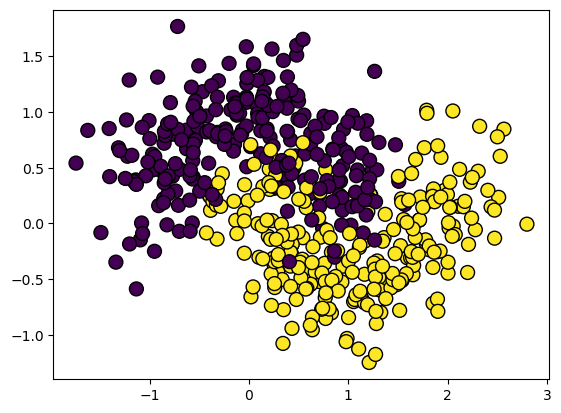

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y=make_moons(n_samples=500, noise=0.30, random_state=42)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor='black')
plt.show()

#### b) data preprocessing

In [35]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

#### c) model fitting

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

mybagging=BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
mybagging.fit(X_train, y_train)
y_pred=mybagging.predict(X_test)

#### d) Test model

분류의 정확도를 계산하여 모델의 성능을 판단한다.

In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.904


약 90%의 정확도를 보이는 알고리즘이다. 다음으로 단일 결정 트리의 결정 경계와 500개의 트리를 사용한 배깅 앙상블의 결정 경계와 성능을 비교해보도록 한다.

In [38]:
tree_clf=DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree=tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


단일 결정 트리는 85.6%의 정확도를 보여주며 배깅 앙상블이 더 좋은 성능을 보여줌을 알 수 있다. 마지막으로 시각화를 통해 결정 경계를 보도록 한다.

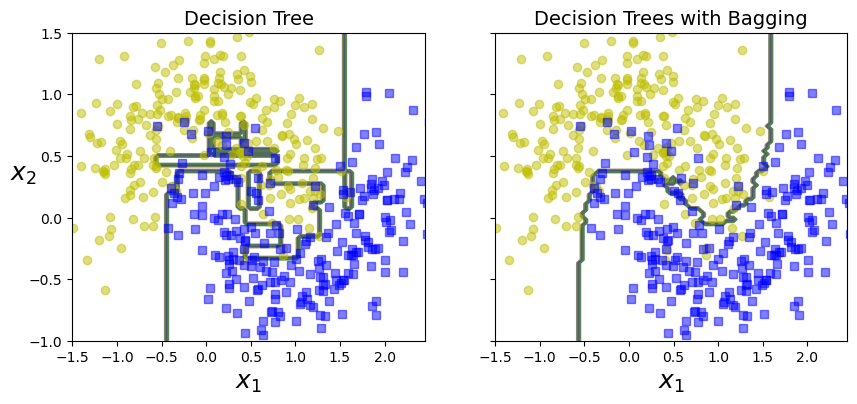

In [39]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s=np.linspace(axes[0], axes[1], 100)
    x2s=np.linspace(axes[2], axes[3], 100)
    x1, x2=np.meshgrid(x1s, x2s)
    X_new=np.c_[x1.ravel(), x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contour(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2=ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r'$x_1$', fontsize=18)
    plt.ylabel(r'$x_2$', fontsize=18, rotation=0)

fig, axes=plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree', fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(mybagging, X, y)
plt.title('Decision Trees with Bagging', fontsize=14)
plt.ylabel('')
plt.show()

배깅 앙상블의 예측이 단일 결정 트리의 예측보다 결정 경계가 덜 불규칙하며 분류 예측의 정확도가 높다.

### 2) boosting

boosting은 약한 학습기(weak, learner, 랜덤 추출보다 조금 더 높은 성능을 내는 알고리즘)을 여러 개 연결하여 강한 학습기(strong learner, 높은 정확도를 내는 알고리즘)를 만드는 앙상블 방법이다.

회귀 모델에서는 피팅이 더 개선될 수 있는지 알아보기 위해 잔차를 종종 사용한다. 부스팅은 이런 개념을 더 발전시켜, 이전 모델이 갖는 오차를 줄이는 방향으로 다음 모델을 연속적으로 생성한다. 에이다부스트(Adaboost)와 그래디언트 부스팅(gradient boosting)은 가장 자주 사용되는 변형된 형태의 부스팅 알고리즘이다.
* 앙상블(ensemble) : 여러 모델들의 집합을 통해 예측 결과를 만들어 내는 것
* 부스팅(boosting) : 연속된 라운드마다 잔차가 큰 레코드들에 가중치를 높여 일련의 모델들을 생성하는 일반적인 기법
* 에이다부스트(AdaBoost) : 잔차에 따라 데이터의 가중치를 조절하는 부스팅의 초기 버전
* 그래디언트 부스팅(gradient boostinig) : 비용 함수(loss function)를 최소화하는 방향으로 부스팅을 활용하는 좀 더 일반적인 형태
* 정규화(regularization) : 비용 함수에 모델의 파라미터 개수에 해당하는 별점 항을 추가해 overfitting을 피하는 방법
* 하이퍼파라미터(hyperparameter) : 알고리즘을 피팅하기 전에 미리 입력값을 결정해야 하는 파라미터

#### a) Gradient Boosting

Gradient Boosting은 이전의 모델이 만든 잔여 오차(Residual Error)에 새로운 모델을 학습시키는 방법이다. 이 과정을 통해 오류를 줄여나갈 수 있다. 데이터를 생성하여 Decision Tree를 한 번만 학습하였을 때와 Gradient Boosting의 방법을 통해 학습시킨 결과를 비교해본다.

##### a-1) import dataset

In [40]:
import numpy as np

np.random.seed(22)
X=2*np.random.randn(100, 1)
y=2*X**2+X*4+10+np.random.randn(100, 1)

##### a-2) model fitting

DecisionTreeRegressor에 data를 train한다.

In [41]:
from sklearn.tree import DecisionTreeRegressor
mytree=DecisionTreeRegressor(max_depth=2)
mytree.fit(X, y)

DecisionTreeRegressor(max_depth=2)

첫 번째 모델에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor를 훈련시킨다.

In [42]:
y2=y-mytree.predict(X)[:, None] ## 2차원의 array 형태로 만듦, [:, None]는 결과를 열 벡터로 만들기 위해 배열을 재구성하는 역할을 합니다.
## mytree.predict(X)[:, None]==mytree.predict(X).reshape(-1, 1)
mytree2=DecisionTreeRegressor(max_depth=2)
mytree2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

두 번째 모델이 만든 잔여 오차에 세 번째 회귀 모델을 훈련시킨다.

In [43]:
y3=y2-mytree2.predict(X)[:, None]
mytree3=DecisionTreeRegressor(max_depth=2)
mytree3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

이제 세 개의 트리를 포함하는 앙상블 모델이 생겼다. 새로운 샘플에 대한 예측을 만들기 위해 모든 트리의 예측값을 더한다.

In [44]:
X_new=np.linspace(-8, 8, 1000).reshape(-1, 1)
y_pred=sum(tree.predict(X_new) for tree in (mytree, mytree2, mytree3))

##### a-3) Test model

세 트리의 예측과 앙상블의 예측을 시각화하여 비교해보자.

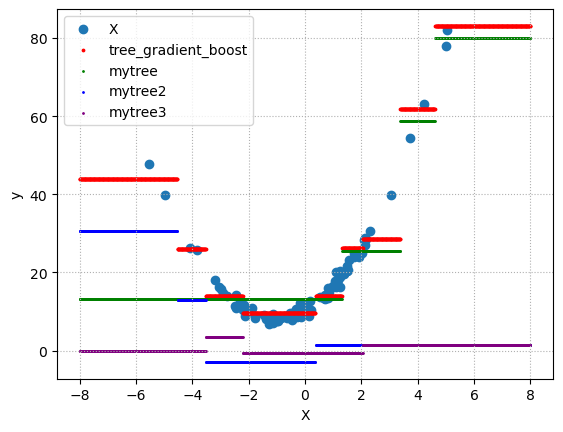

In [45]:
plt.scatter(X, y)
plt.scatter(X_new, y_pred, c='red', s=3)
plt.scatter(X_new, mytree.predict(X_new), c='green', s=1)
plt.scatter(X_new, mytree2.predict(X_new), c='blue', s=1)
plt.scatter(X_new, mytree3.predict(X_new), c='purple', s=1)
plt.xlabel('X')
plt.ylabel('y')
plt.grid(linestyle='dotted')
plt.legend(['X', 'tree_gradient_boost', 'mytree', 'mytree2', 'mytree3'], loc='upper left')
plt.show()

앙상블 모델의 예측값이 트리를 이용한 예측값보다 좋다는 것을 알 수 있다(빨간색).

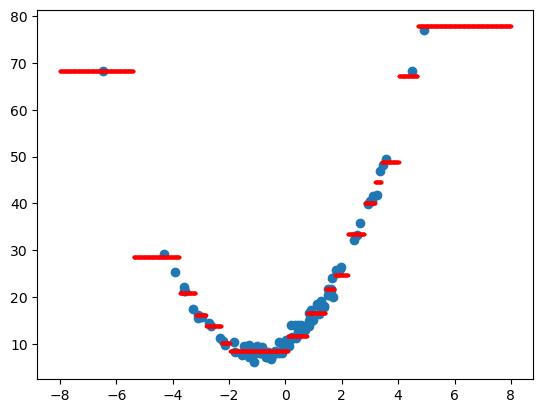

In [46]:
import numpy as np

X=2*np.random.randn(100, 1)
y=2*X**2+X*4+10+np.random.randn(100, 1)

treelist=[]

# initial value
mytree=DecisionTreeRegressor(max_depth=2)
treelist.append(mytree)
mytree.fit(X, y)

# Gradient Boosting을 10번 실행하는 반복문
for i in range(0, 10):
    y2=y-mytree.predict(X)[:, None]
    mytree=DecisionTreeRegressor(max_depth=2)
    treelist.append(mytree)
    mytree.fit(X, y2)
    y=y2

# 반복문에 의해 y가 달라졌으므로 처음의 y를 다시 지정
y=2*X**2+X*4+10+np.random.randn(100, 1)
X_new=np.linspace(-8, 8, 1000).reshape(-1, 1)
y_pred=sum(tree.predict(X_new) for tree in treelist)

# visualization
plt.scatter(X, y)
plt.scatter(X_new, y_pred, c='red', s=3)
plt.show()

10번 반복 후 예측력이 훨씬 좋아졌다. 다음은 sklearn에서 제공하는 Gradient Boosting package를 이용한 코드이다.

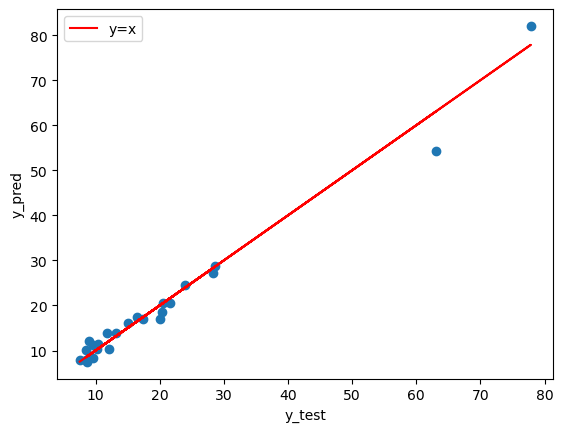

In [47]:
import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(22)
X=2*np.random.randn(100, 1)
y=2*X**2+X*4+10+np.random.randn(100, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

from sklearn.ensemble import GradientBoostingRegressor
mygbt=GradientBoostingRegressor(learning_rate=0.1, random_state=0)
mygbt.fit(X_train, y_train)
y_pred=mygbt.predict(X_test)

plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label='y=x', color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

#### b) XGBoost

XGBoost는 부스팅에 관련된 여러 알고리즘에서 현재 가장 인기가 많다. 매우 빠른 속도와 정확도 등으로 머신러닝 경연 대회에서 자주 사용되는 도구 중의 하나이다.

##### b-1) import dataset

In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd
import numpy as np
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [50]:
np.random.seed(22)
X=2*np.random.randn(1000, 1)
y=2*X**2+X*4+10+np.random.randn(1000, 1)

##### b-2) data preprocessing

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

##### b-3) model fitting

In [52]:
myxgb=xgboost.XGBRegressor(random_state=0)
myxgb.fit(X_train, y_train)
y_pred=myxgb.predict(X_test)

##### b-4) Test model

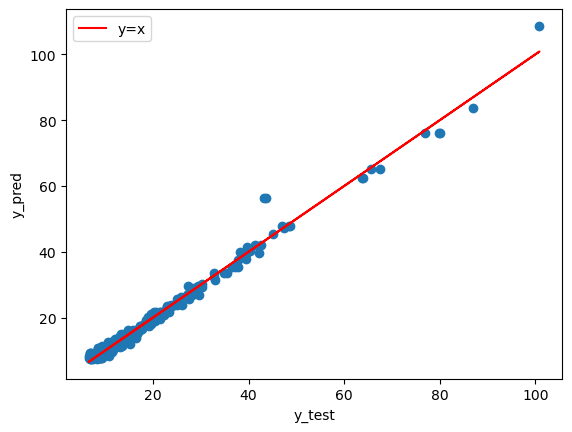

In [53]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, label='y=x', color='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

예측값이 실제값을 잘 추정하고 있음을 확인할 수 있다.

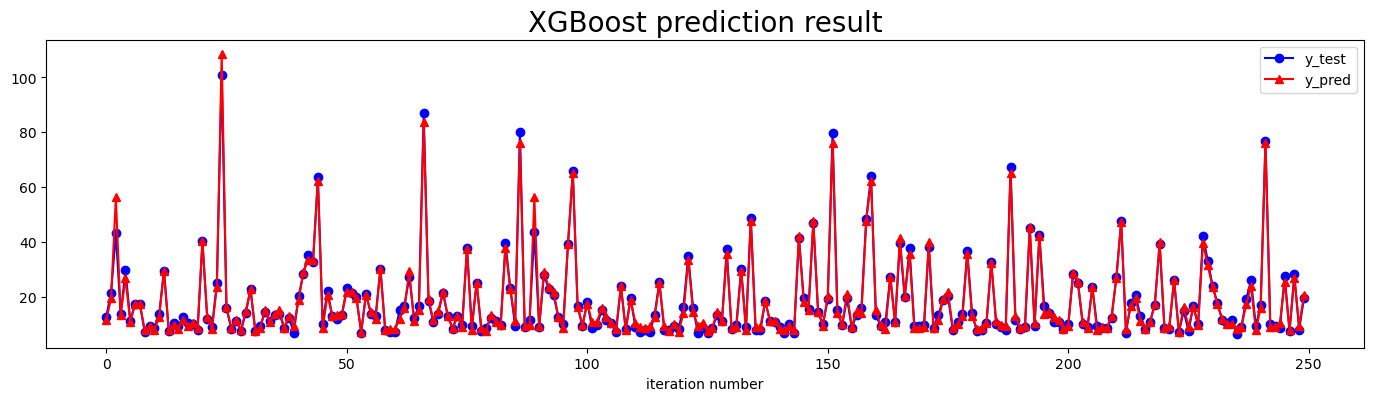

In [54]:
plt.figure(figsize=(17, 4))
plt.plot(y_test, marker='o', color='b', label='y_test')
plt.plot(y_pred, marker='^', color='r', label='y_pred')
plt.title('XGBoost prediction result', size=20)
plt.xlabel('iteration number')
plt.legend()
plt.show()

cf. hyperparameter

learning rate는 XGBoost의 hyperparameter(tuning parameter) 중 하나이다. 즉, learning rate를 변화시키면서 최적의 모델을 찾기 위한 과정이 필요하다. 일반적으로 learning rate의 값은 0.1, 0.05, 0.01, 0.001을 이용한다.

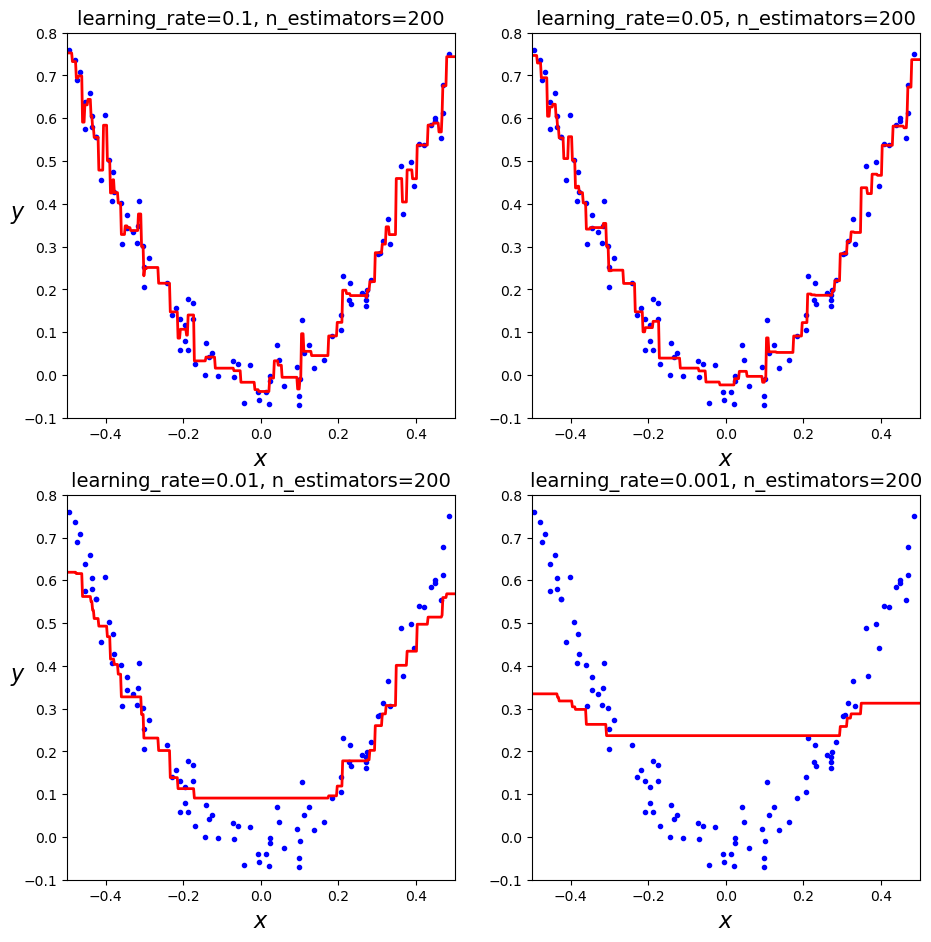

In [55]:
def plot_predictions(regressors, X, y, axes, label=None, style='r-', data_style='b.',
                    data_label=None):
    x1=np.linspace(axes[0], axes[1], 500)
    y_pred=sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc='upper center', footsize=16)
    plt.axis(axes)

np.random.seed(42)
X=np.random.rand(100, 1)-0.5
y=3*X[:, 0]**2+0.05*np.random.randn(100)

from sklearn.ensemble import GradientBoostingRegressor

gbrt1=GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1,
                                random_state=42)
gbrt1.fit(X, y)

gbrt2=GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.05,
                                random_state=42)
gbrt2.fit(X, y)

gbrt3=GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.01,
                                random_state=42)
gbrt3.fit(X, y)

gbrt4=GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.001,
                                random_state=42)
gbrt4.fit(X, y)

plt.figure(figsize=(11, 11))

plt.subplot(221)
plot_predictions([gbrt1], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('learning_rate={}, n_estimators={}'.format(gbrt1.learning_rate, gbrt1.n_estimators),
          fontsize=14)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

plt.subplot(222)
plot_predictions([gbrt2], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('learning_rate={}, n_estimators={}'.format(gbrt2.learning_rate, gbrt2.n_estimators),
          fontsize=14)
plt.xlabel('$x$', fontsize=16)

plt.subplot(223)
plot_predictions([gbrt3], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('learning_rate={}, n_estimators={}'.format(gbrt3.learning_rate, gbrt3.n_estimators),
          fontsize=14)
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16, rotation=0)

plt.subplot(224)
plot_predictions([gbrt4], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('learning_rate={}, n_estimators={}'.format(gbrt4.learning_rate, gbrt4.n_estimators),
          fontsize=14)
plt.xlabel('$x$', fontsize=16)

plt.show()

cf. Gradient Boosting VS. XGBoost

Gradient Boosting과 XGBoost를 비교해보자.

In [56]:
from sklearn.metrics import mean_squared_error

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbt=GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbt.fit(X_train, y_train)
y_pred=gbt.predict(X_test)
%timeit GradientBoostingRegressor().fit(X_train, y_train)
print('validation error', mean_squared_error(y_test, y_pred))

44.1 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
validation error 1.1802893464703095


In [57]:
# XGBoost
xgb=xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
%timeit xgboost.XGBRegressor().fit(X_train, y_train)
print('validation error', mean_squared_error(y_test, y_pred))

31.6 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
validation error 2.9000725733958364


위의 데이터에 대해서 예측의 정확성을 고려할 때, Gradient Boosting이 더 좋은 성능을 보인다.

### 3) random forest

Bagging은 복원 추출 방식으로 데이터를 만들기 때문에 중복되는 데이터가 발생한다. 따라서, 독립성이 깨지는 문제가 발생하는데, 독립성을 만족시키지 못할 경우 모델 간의 공분산이 발생하여 비슷한 tree가 만들어질 가능성이 높아진다.

random forest는 Bagging처럼 데이터를 반복 복원추출하며, 변수 또한 randoom하게 추출하여 다양한 모델을 반든다. 변수를 random하게 추출하여 모델을 다양하게 만드는 과정을 통해 모델 간 공분산을 줄이는 효과가 나오는 것이다.

kaggle에서 제공하는 데이터를 이용하여 random forest를 실습한다.

#### a) import dataset

In [58]:
import pandas as pd

mydata=pd.read_csv("C:/Users/User/Desktop/2024-1/빅분방/otto_data.csv")
mydata.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


id는 고유 아이디이며 필요한 feature가 아니므로 삭제한다. feat_1-feat_93은 feature이며 target columns는 클래스가 9개(Class1-Class9)로 나누어져 있는 target이다.

#### b) data preprocessing

In [59]:
mydata=mydata.drop(['id'], axis=1)

target을 수치형 변수로 변환하기 위해 라벨인코딩을 한다.

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
encoder.fit(mydata['target'])
mydata['target']=encoder.transform(mydata['target'])
print('라벨링 결과')
for i, label in enumerate(encoder.classes_):
    print(label, '->', i)

라벨링 결과
Class_1 -> 0
Class_2 -> 1
Class_3 -> 2
Class_4 -> 3
Class_5 -> 4
Class_6 -> 5
Class_7 -> 6
Class_8 -> 7
Class_9 -> 8


다음으로 학습을 위해 데이터를 train/test로 분리한다.

In [61]:
feature_columns=list(mydata.columns.difference(['target']))
X=mydata[feature_columns]
y=mydata['target']

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


#### c) model fitting

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

myrf=RandomForestClassifier(n_estimators=20, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

#### d) Test model

In [64]:
y_pred=myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6010019392372333


정확도가 약 60% 나왔다. 성능을 높이기 위해 sample을 늘려본다.

In [65]:
# sample=100
myrf=RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred=myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6240303813833226


In [66]:
# sample=200
myrf=RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred=myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6157886231415644


In [67]:
# sample=400
myrf=RandomForestClassifier(n_estimators=400, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred=myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6165966386554622


In [68]:
# sample=500
myrf=RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)
myrf.fit(X_train, y_train)
y_pred=myrf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6168390433096316


sample의 개수가 늘어날수록 정확도가 비례하여 좋아지지는 않는다는 것을 확인했다. 일반적으로 RF에서 max_depth=5로 지정한다.

cf. Grid Search CV

learning rate 이외에 여러 Boosting 모델에서는 다양한 hyperparameter가 존재한다. Hyperparameter는 모델을 세부적으로 tuning하여 최적의 성능을 내는 모델을 찾는 과정이다. 가장 좋은 성능을 내는 hyperparameter 조합을 찾는 것은 매우 많은 경우의 수가 존재하기 때문에 Grid Search를 사용하는 것이 좋다. 설정하고자 하는 hyperparameter와 그 값을 지정하면 된다. 그 다음 가능한 모든 hyperparameter 조합에 대해 Cross validation(교차 검증)을 사용해 평가하게 된다. 예를 들어 다음 코드는 RandomForestRegressor에 대한 최적의 hyperparameter 조합을 탐색한다.

In [69]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X=data
y=target

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid=[
    {'n_estimators' : [100, 200, 300], 'max_features' : [2, 3, 4, 5]},
     {'bootstrap' : [False], 'n_estimators' : [100, 200, 300], 'max_features' : [4, 5, 6, 7, 8]}
     ]

forest_reg=RandomForestRegressor()

grid_search=GridSearchCV(forest_reg, param_grid, cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features' : [2, 3, 4, 5],
                          'n_estimators' : [100, 200, 300]},
                         {'bootstrap' : [False], 'max_features' : [4, 5, 6, 7, 8],
                          'n_estimators' : [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 3, 4, 5],
                          'n_estimators': [100, 200, 300]},
                         {'bootstrap': [False], 'max_features': [4, 5, 6, 7, 8],
                          'n_estimators': [100, 200, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

grid search는 scoring에 지정된 함수의 값이 클수록 좋은 함수로 인식한다. 따라서 scoring='neg_mean_squared_error'를 사용해야 가장 작은 RMSE(root mean squared error) 값이 제일 큰 값으로 인식되고, 나중에 다시 (-)를 곱하면 원래의 RMSE 값이 출력된다.

Param_grid 설정에 따라 sklearn이 먼저 첫 번째 dict에 있는 n_estimators와 max_features 조합인 3x4=12개를 평가한 다음, 두 번째 dict에 있는 조합인 3x5=15개를 시도한다. 다른 조합을 시도해보고 싶다면 dict을 추가해주면 된다. 첫 번째 조합과 두 번째 조합을 모두 탐색하면 hyperparameter의 값이 12+15=27개의 모델을 훈련하고 각각 다섯 번씩 모델을 훈련한다. (5-cross validation을 사용하기 때문이다.) 따라서, 총 27x5=135번 훈련하게 된다. 훈련 후 다음과 같이 최적의 조합을 얻을 수 있다.

In [70]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 200}

이 예시에서는 max_features가 4, n_estimators가 300일 때 최적의 모델을 훈련한다. (코드를 수행할 때마다 다른 조합의 결과가 나온다.)

In [71]:
grid_search.best_estimator_

RandomForestRegressor(max_features=5, n_estimators=200)

각 모델에 대한 테스트 결과도 확인할 수 있다.

In [72]:
cvres=grid_search.cv_results_

import numpy as np

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

3.887255654462174 {'max_features': 2, 'n_estimators': 100}
3.776059194183585 {'max_features': 2, 'n_estimators': 200}
3.7881747406631456 {'max_features': 2, 'n_estimators': 300}
3.717899076854966 {'max_features': 3, 'n_estimators': 100}
3.6295481020156855 {'max_features': 3, 'n_estimators': 200}
3.675060826318378 {'max_features': 3, 'n_estimators': 300}
3.6693029922647713 {'max_features': 4, 'n_estimators': 100}
3.598341097894671 {'max_features': 4, 'n_estimators': 200}
3.7147113205797693 {'max_features': 4, 'n_estimators': 300}
3.656112653362047 {'max_features': 5, 'n_estimators': 100}
3.573146109041531 {'max_features': 5, 'n_estimators': 200}
3.636625897504709 {'max_features': 5, 'n_estimators': 300}
3.6035155157802667 {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
3.6132262175157113 {'bootstrap': False, 'max_features': 4, 'n_estimators': 200}
3.6177687947774815 {'bootstrap': False, 'max_features': 4, 'n_estimators': 300}
3.6541491303899485 {'bootstrap': False, 'max_fea

In [73]:
cvres

{'mean_fit_time': array([0.09893599, 0.19830427, 0.30727224, 0.114539  , 0.22020626,
        0.33616638, 0.12197008, 0.24651337, 0.36654143, 0.12912626,
        0.26244054, 0.39930987, 0.10327244, 0.22020235, 0.32173734,
        0.11382031, 0.23134284, 0.35619621, 0.13282766, 0.2582736 ,
        0.39114256, 0.14060955, 0.27382059, 0.41400604, 0.15822687,
        0.3027482 , 0.45290251]),
 'std_fit_time': array([8.75975999e-03, 9.14551510e-03, 6.28428460e-03, 7.27621993e-03,
        7.46029883e-03, 8.64982379e-03, 6.30200622e-03, 8.58732637e-03,
        4.99174156e-03, 6.46423091e-03, 8.87995447e-03, 5.20644867e-03,
        5.57106255e-03, 3.75958088e-03, 5.42603875e-03, 9.75175771e-03,
        6.28100928e-03, 5.14005791e-03, 9.39212445e-04, 5.15801117e-03,
        1.41966909e-02, 4.10190833e-07, 8.36817146e-03, 9.12962821e-03,
        4.09833347e-03, 5.27140813e-03, 9.50241662e-03]),
 'mean_score_time': array([0.00624595, 0.00936584, 0.01429625, 0.00584064, 0.00937715,
        0.015269

여러 boosting 모델을 정의하여 각 모델별 grid search를 진행해보도록 한다.

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor

def clf3():
    rf=RandomForestRegressor()
    gb=GradientBoostingRegressor()
    xg=XGBRegressor()
    return rf, gb, xg

from sklearn import model_selection
rf, gb, xg=clf3()

rf_parameters={'max_depth' : [3, 4, 5, 6, 7, 8], 'n_estimators' : [100, 200, 300],
               'random_state' : [99]}
gb_parameters={'max_depth' : [4, 5, 7], 'n_estimators' : [100, 200, 300],
               'learning_rate' : [0.01, 0.1], 'random_state' : [99]}
xg_parameters={'max_depth' : [3, 4, 5, 6], 'n_estimators' : [100, 200, 300],
               'learning_rate' : [0.01, 0.1], 'gamma' : [0.5, 1, 2], 'random_state' : [99]}

grid_search_rf=model_selection.GridSearchCV(estimator=rf, param_grid=rf_parameters,
                                            scoring='recall', cv=10)
grid_search_rf.fit(X_train, y_train)

best_rf=grid_search_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=3, random_state=99)

In [75]:
print(round(best_rf.score(X_test, y_test), 3))

0.823


In [76]:
from sklearn.metrics import r2_score
y_pred_rf=best_rf.predict(X_test)
r2_score(y_pred_rf, y_test)

0.7334430608741815

In [77]:
grid_search_gb=model_selection.GridSearchCV(estimator=gb, param_grid=gb_parameters,
                                            scoring='recall', cv=10)
grid_search_gb.fit(X_train, y_train)

best_gb=grid_search_gb.best_estimator_
best_gb

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, random_state=99)

In [78]:
print(round(best_gb.score(X_test, y_test), 3))

0.742


In [79]:
from sklearn.metrics import r2_score

y_pred_gb=best_gb.predict(X_test)
r2_score(y_pred_gb, y_test)

0.19733554245189855

In [80]:
grid_search_xg=model_selection.GridSearchCV(estimator=xg, param_grid=gb_parameters,
                                           scoring='recall', cv=10)
grid_search_xg.fit(X_train, y_train)

best_xg=grid_search_xg.best_estimator_
best_xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=99, ...)

In [81]:
print(round(best_xg.score(X_test, y_test), 3))

0.708


In [82]:
from sklearn.metrics import r2_score

y_pred_xg=best_xg.predict(X_test)
r2_score(y_pred_xg, y_test)

-0.06572687852587022

## 7. Study Case for classification

앞에서 배운 classification algorithm에 UCI에서 제공하는 Bank Marketing Dataset을 이용하여 'deposit'을 이용할 것인지 아닌지를 예측하는 모델을 만들고 각 모델별로 예측력을 비교해보자.

데이터는 Portuguese banking institution의 고객과 마케팅에 대한 정보를 나타낸다. feature들은 고객의 정보와 전화를 이용한 deposit 광고, 고객과 사회의 당시 경제 정보이며, target은 deposit의 이용을 수락하였는지 아닌지에 대한 binary 변수이다.
* age : (numeric)
* job : type of job(categorical)
* marital : marital status(categorical)
* education : (categorical)
* default : has credit in default?(categorical)
* housing : has housing loan?(categorical)
* loan : has personal loan?(categorical)
* contact : contact communication type(categorical)
* month : last contact month of year(categorical)
* day_of_week : last contact day of the week(categorical)
* duration : last contact duration, in seconds(numeric), Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* campaign : number of contacts performed during this campaign and for this client(numeric)
* pdays : number of days that passed by after the client was last contacted from a previous campaign(numeric)
* emp.var.rate : employment variation rate(numeric)
* cons.price.idx : consumer price index(numeric)
* cons.conf.idx : consumer confidence index(numeric)
* euribor3m : euribor 3 month rate(numeric)
* nr.employed : number of employees(numeric)
* y : has the client subscribed a term deposit?(binary)

#### a) import dataset

In [83]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd

bank=pd.read_csv("C:/Users/User/Desktop/2024-1/빅분방/bank-additional-full.csv", sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [84]:
bank.shape

(41188, 21)

데이터 개수는 41188개이며 feature의 개수는 20개, target은 1개이다. 다음으로, feature과 target에 대한 변수 타입을 관찰한다.

In [85]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

모델링을 하기 이전 단계에서 type이 'object'인 feature는 라벨링 과정이 필요하다. duration은 y가 관측된 이후 작성된 데이터이므로 duration에 의해 모델의 성능이 영향을 받는다. 따라서, 해당 변수는 제거 후 모델링을 하도록 한다.

In [86]:
bank=bank.drop(['duration'], axis=1)

또한, 몇 가지 범주형 변수에 대하여 histogram을 그려 각 feature에 대해 살펴보도록 한다.

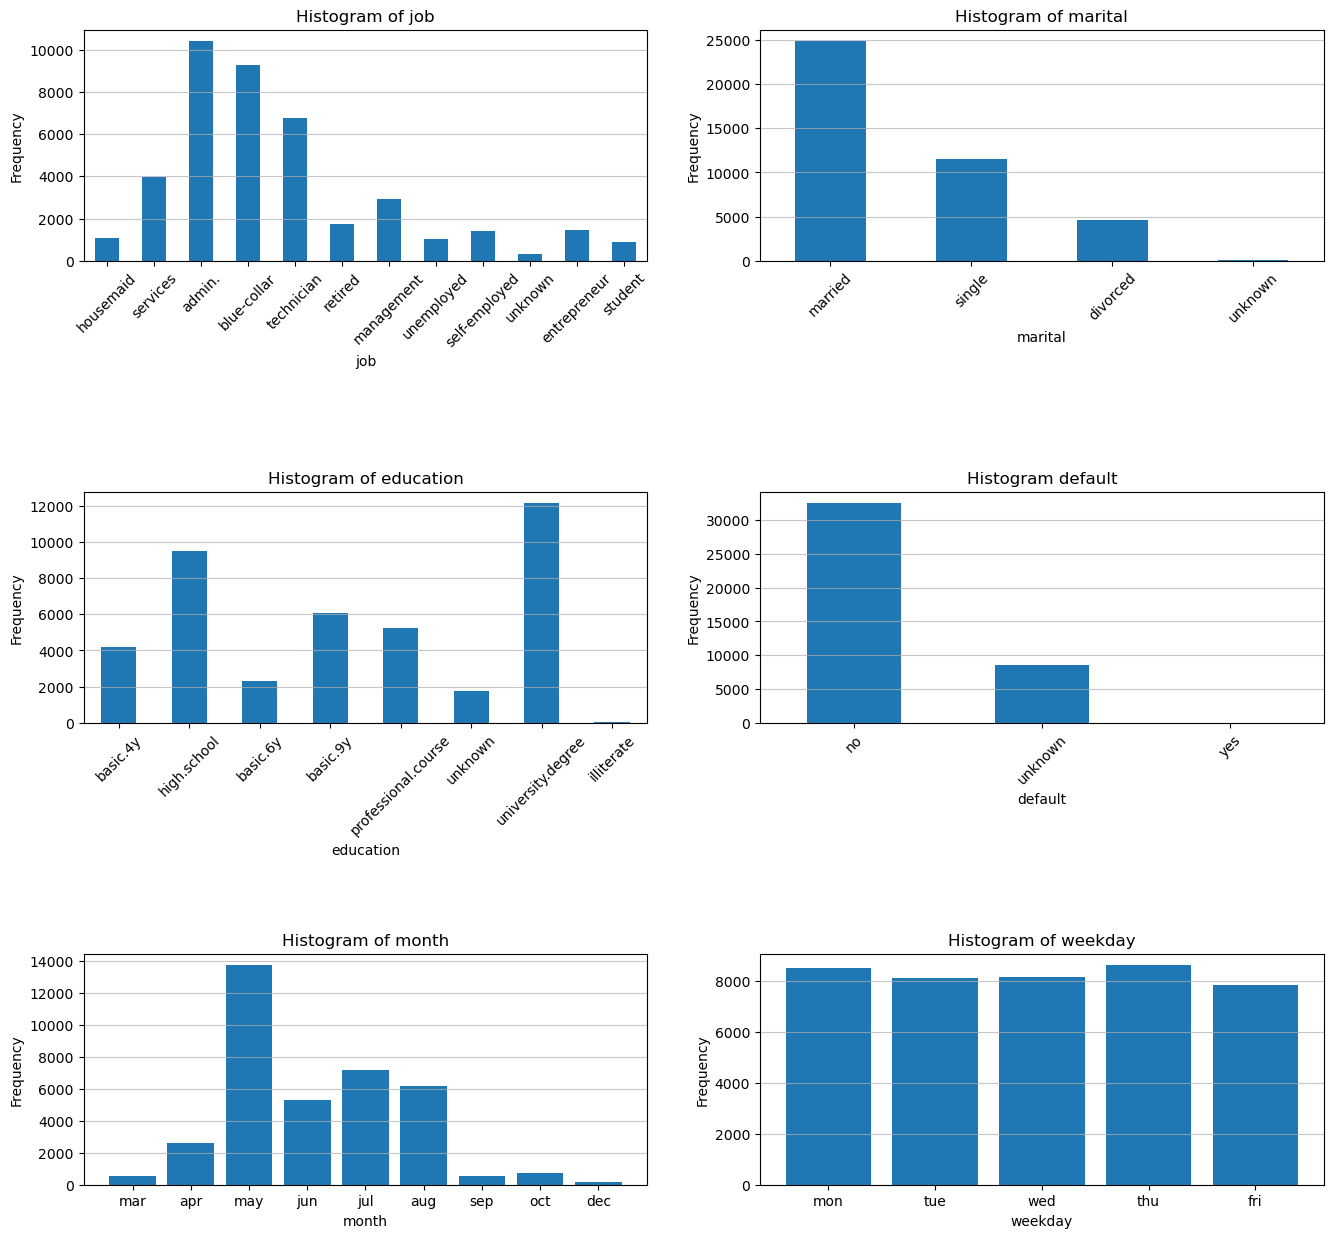

In [87]:
plt.figure(figsize=(16, 15))
plt.subplots_adjust(hspace=1)

plt.subplot(321)
bank['job'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of job')
plt.xlabel('job')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.subplot(322)
bank['marital'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of marital')
plt.xlabel('marital')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.subplot(323)
bank['education'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of education')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.subplot(324)
bank['default'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram default')
plt.xlabel('default')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.subplot(325)
month_order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'dec']
df_month=bank['month'].value_counts()
df_month=df_month.loc[month_order]
plt.bar(df_month.index, df_month.values)
plt.title('Histogram of month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

plt.subplot(326)
weekday_order=['mon', 'tue', 'wed', 'thu', 'fri']
df_weekday=bank['day_of_week'].value_counts()
df_weekday=df_weekday.loc[weekday_order]
plt.bar(df_weekday.index, df_weekday.values)
plt.title('Histogram of weekday')
plt.xlabel('weekday')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

다음으로 target에 대한 그래프를 그린다.

In [88]:
bank['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

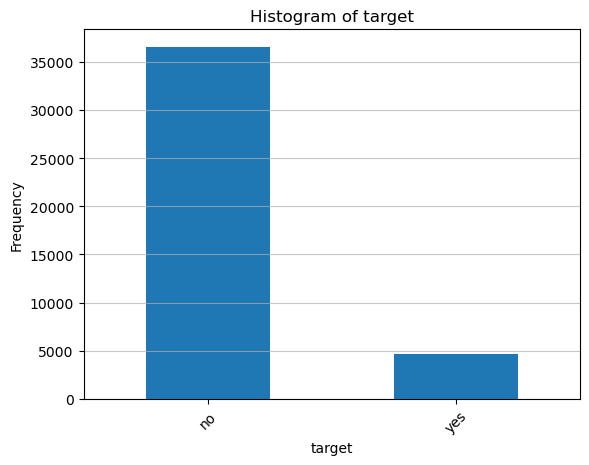

In [89]:
bank['y'].value_counts(sort=False).plot.bar(rot=45)
plt.title('Histogram of target')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7)

'no'의 빈도수가 'yes'에 비해 많다. (편향되어 있음)

#### b) data preprocessing

데이터에 결측치가 없는지 확인하다.

In [90]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

결측치가 존재하지 않는다. 범주형 변수들을 원-핫 인코딩 후 데이터를 분리한다.

In [91]:
X=bank.drop('y', axis=1)
Y=bank['y']

mydf=pd.DataFrame(data=X.values, columns=X.columns)
X=pd.get_dummies(data=mydf,
                 columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'],
                 prefix=['job', 'marital', 'education', 'default', 'housinig', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)

In [92]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   age                            41188 non-null  object
 1   campaign                       41188 non-null  object
 2   pdays                          41188 non-null  object
 3   previous                       41188 non-null  object
 4   emp.var.rate                   41188 non-null  object
 5   cons.price.idx                 41188 non-null  object
 6   cons.conf.idx                  41188 non-null  object
 7   euribor3m                      41188 non-null  object
 8   nr.employed                    41188 non-null  object
 9   job_admin.                     41188 non-null  bool  
 10  job_blue-collar                41188 non-null  bool  
 11  job_entrepreneur               41188 non-null  bool  
 12  job_housemaid                  41188 non-null  bool  
 13  j

object형 feature를 모두 float으로 바꾼다.

In [93]:
col=X.select_dtypes('object').columns
for name in col:
    X[name]=X[name].astype(float)

마지막으로 train/test data를 분리한다.

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y,
                                                  shuffle=True,
                                                  test_size=0.2,
                                                  random_state=1)

#### c) model fitting

##### c-1) Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

mytree=DecisionTreeClassifier(criterion='gini')
mytree.fit(X_train, y_train)

DecisionTreeClassifier()

In [96]:
##### c-2) Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

mygbt=GradientBoostingClassifier(learning_rate=0.1)
mygbt.fit(X_train, y_train)

GradientBoostingClassifier()

##### c-3) XGBoost

In [98]:
import xgboost
myxgbt=xgboost.XGBClassifier(use_label_encoder=False)
myxgbt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

##### c-4) Bagging

In [99]:
from sklearn.ensemble import BaggingClassifier

mybag=BaggingClassifier(DecisionTreeClassifier(),
                        n_estimators=500,
                        max_samples=100, bootstrap=True,
                        random_state=1)
mybag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, random_state=1)

##### c-5) Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

myrf=RandomForestClassifier(n_estimators=500, max_depth=5, random_state=1)
myrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=1)

#### d) Test model

In [101]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics
    import pandas as pd
    y_pred=model.predict(x_test)
    acc=metrics.accuracy_score(y_test, y_pred)
    mtx=metrics.confusion_matrix(y_test, y_pred)
    label=['no', 'yes']
    table=pd.DataFrame(mtx, columns=label, index=label)
    return table, acc

def return_fun(mymodel, X_test, y_test):
    print('==========')
    print(f'{mymodel} 결과')
    print('==========')
    print(f'{evaluate_model(mymodel, X_test, y_test)[0]}')
    print(f'accuracy')
    print(f'{evaluate_model(mymodel, X_test, y_test)[1]}')
    print('\n')

return_fun(mytree, X_test, y_test)
return_fun(mygbt, X_test, y_test)
return_fun(myxgbt, X_test, y_test)
return_fun(mybag, X_test, y_test)
return_fun(myrf, X_test, y_test)

DecisionTreeClassifier() 결과
       no  yes
no   6569  725
yes   616  328
accuracy
0.8372177713037144


GradientBoostingClassifier() 결과
       no  yes
no   7178  116
yes   704  240
accuracy
0.9004612770089827


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) 결과
       no  yes
no   7098  196

마지막으로 accuracy를 시각화하여 비교한다.

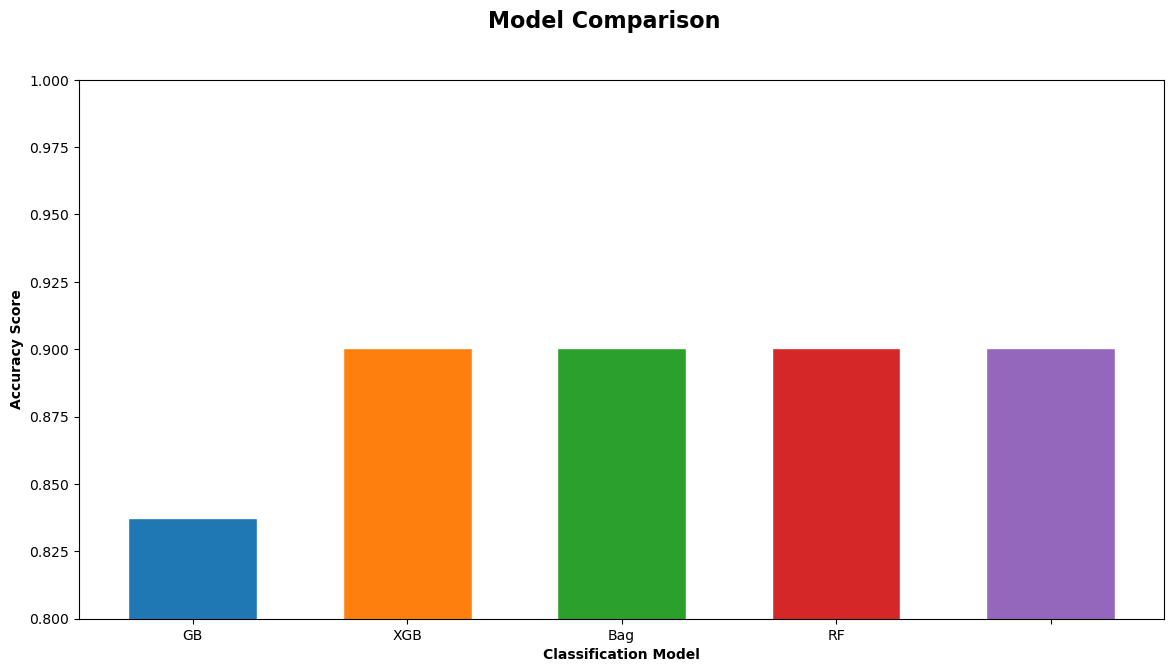

In [102]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1=plt.subplots(1, 1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barWidth=0.6

ax1.bar(0, evaluate_model(mytree, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(1, evaluate_model(mygbt, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(2, evaluate_model(mygbt, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(3, evaluate_model(mygbt, X_test, y_test)[1], width=barWidth, edgecolor='white')
ax1.bar(4, evaluate_model(mygbt, X_test, y_test)[1], width=barWidth, edgecolor='white')

ax1.set_xlabel('Classification Model', fontweight='bold')
labels=['DT', 'GB', 'XGB', 'Bag', 'RF']
ax1.set_xticklabels(labels)
ax1.set_ylabel('Accuracy Score', fontweight='bold')
ax1.set_ylim(0.8, 1.0)
plt.show()

Gradient Boosting의 accuracy는 90%로 5가지 모델 중 performance가 가장 좋다. (사실 비교 어려움)